# Part 2

## 1. ~ 4.

In [13]:
import numpy as np
import pandas as pd
import csv
from scipy.stats import multivariate_normal
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn import metrics 
import matplotlib.pyplot as plt


In [14]:
# Show the data
df = pd.read_csv(r"C:\Users\nick8\Downloads\Raisin_Dataset.csv")
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [15]:
Class1 = df.iloc[0:450,0:7]
Class2 = df.iloc[450:900,0:7]
Class1 = pd.DataFrame(Class1,columns=['Area','MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter'])
Class2 = pd.DataFrame(Class2,columns=['Area','MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter'])

mean1=np.array(Class1.mean(axis=0))
cov1=pd.DataFrame.cov(Class1)
mean2=np.array(Class2.mean(axis=0))
cov2=pd.DataFrame.cov(Class2)

# Sample classes
result1 = np.random.multivariate_normal(mean1, cov1, size=10)
result2 = np.random.multivariate_normal(mean2, cov2, size=10)


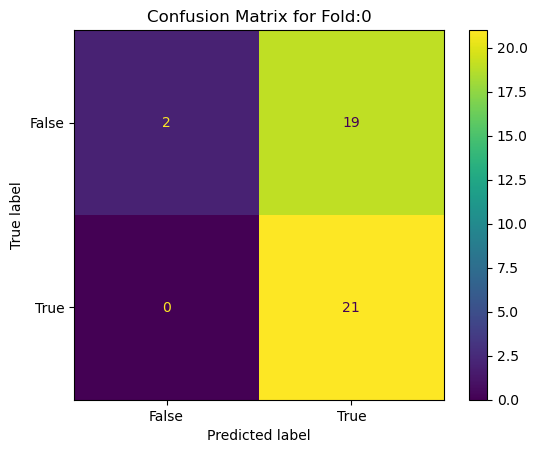

True Negative Rate: 0.047619047619047616 

False Negative Rate: 0.0 

False Positive Rate: 0.4523809523809524 

True Positive Rate: 0.5 

Accuracy: 0.5476190476190477 



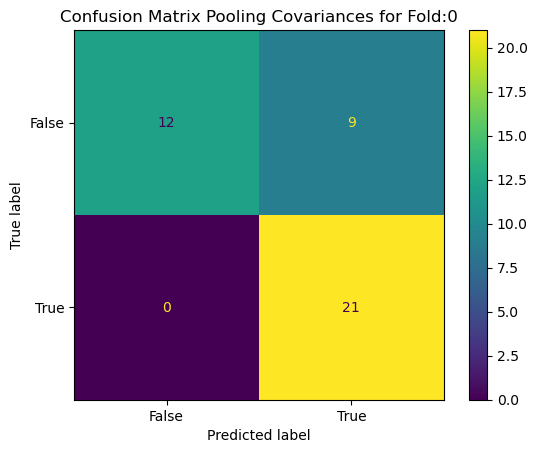

True Negative Rate (Pooling): 0.2857142857142857 

False Negative Rate (Pooling): 0.0 

False Positive Rate (Pooling): 0.21428571428571427 

True Positive Rate (Pooling): 0.5 

Accuracy (Pooling): 0.7857142857142857 



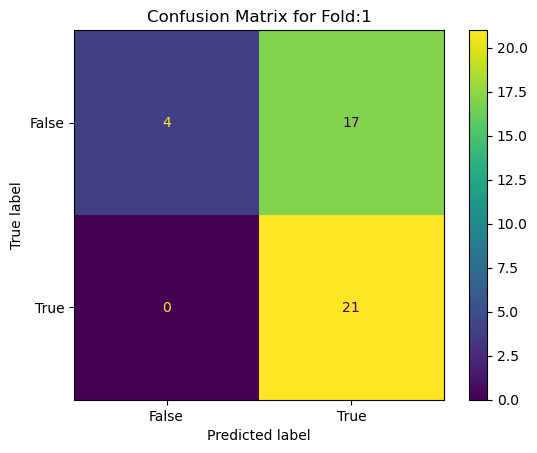

True Negative Rate: 0.09523809523809523 

False Negative Rate: 0.0 

False Positive Rate: 0.40476190476190477 

True Positive Rate: 0.5 

Accuracy: 0.5952380952380952 



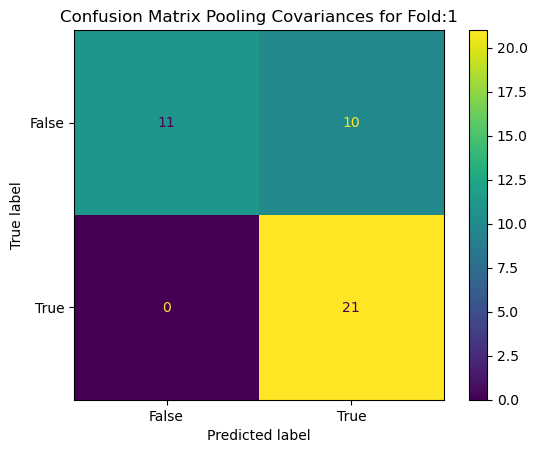

True Negative Rate (Pooling): 0.2619047619047619 

False Negative Rate (Pooling): 0.0 

False Positive Rate (Pooling): 0.23809523809523808 

True Positive Rate (Pooling): 0.5 

Accuracy (Pooling): 0.7619047619047619 



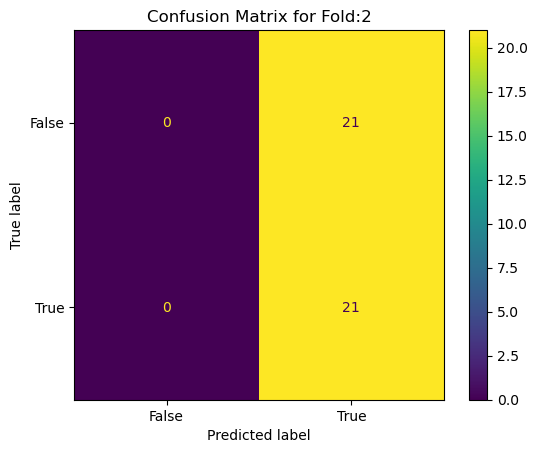

True Negative Rate: 0.0 

False Negative Rate: 0.0 

False Positive Rate: 0.5 

True Positive Rate: 0.5 

Accuracy: 0.5 



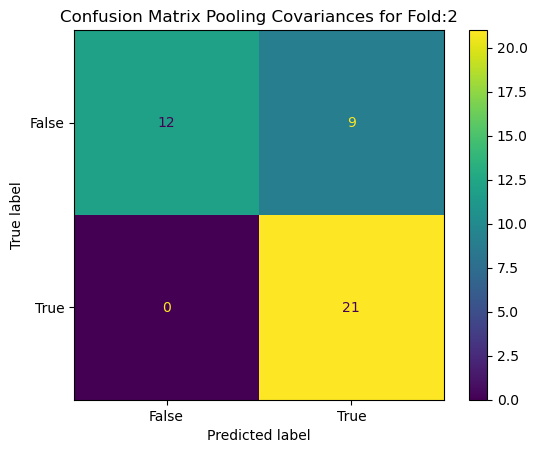

True Negative Rate (Pooling): 0.2857142857142857 

False Negative Rate (Pooling): 0.0 

False Positive Rate (Pooling): 0.21428571428571427 

True Positive Rate (Pooling): 0.5 

Accuracy (Pooling): 0.7857142857142857 



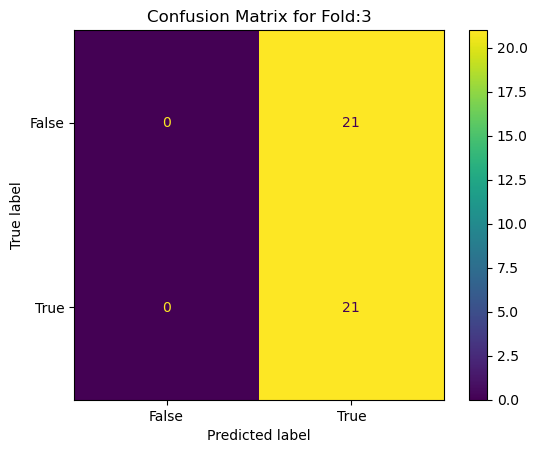

True Negative Rate: 0.0 

False Negative Rate: 0.0 

False Positive Rate: 0.5 

True Positive Rate: 0.5 

Accuracy: 0.5 



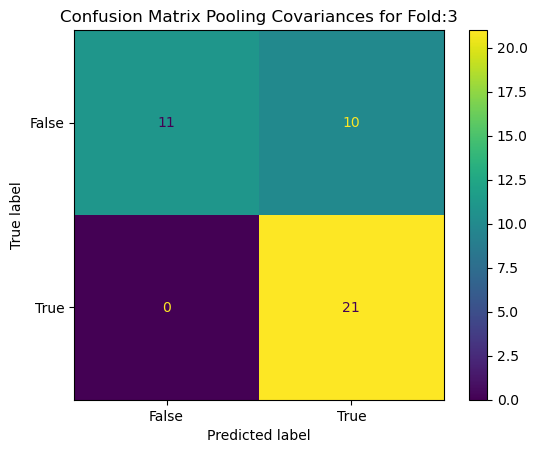

True Negative Rate (Pooling): 0.2619047619047619 

False Negative Rate (Pooling): 0.0 

False Positive Rate (Pooling): 0.23809523809523808 

True Positive Rate (Pooling): 0.5 

Accuracy (Pooling): 0.7619047619047619 



In [16]:
from sklearn.model_selection import train_test_split
for fold in range(4):
        Sample_Train1,Sample_Test1 = train_test_split(result1,test_size=0.25,shuffle=True)
        Sample_Train2,Sample_Test2 = train_test_split(result2,test_size=0.25,shuffle=True)
        Sample_Test=np.vstack((Sample_Test1,Sample_Test2))

        M_Sample1=np.array(Sample_Train1.mean(axis=0))
        Cov_Sample1=np.cov(Sample_Train1)
        #print(M_Sample1,"\n",Cov_Sample1)
        M_Sample2=np.array(Sample_Train2.mean(axis=0))
        Cov_Sample2=np.cov(Sample_Train2)
        #print(M_Sample2,"\n",Cov_Sample2)

        Test_labels = [[0 for x in range(7)] for y in range(6)]

        for i in range(2):
            for j in range(7):
                GC_Sample1 = np.log(np.exp(-(Sample_Test[i,j]-M_Sample1[j])**2 / (2*Cov_Sample1[j,j])) / (2*np.pi * Cov_Sample1[j,j])**(-1/2))
                GC_Sample2 = np.log(np.exp(-(Sample_Test[i,j]-M_Sample2[j])**2 / (2*Cov_Sample2[j,j])) / (2*np.pi * Cov_Sample2[j,j])**(-1/2))
                if GC_Sample1-GC_Sample2>0:
                    Test_labels[i][j]='Kecimen'
                else:
                    Test_labels[i][j]='Besni'

        #print(Test_labels)

        ActualSamples = [[0 for x in range(7)] for y in range(6)]
        for i in range(6):
            for j in range(7):
                if i<3:
                    ActualSamples[i][j]= 0

                else:
                    ActualSamples[i][j]= 1

        #print(ActualSamples)

        ActualS = np.concatenate((ActualSamples[0],ActualSamples[1],ActualSamples[2],ActualSamples[3],ActualSamples[4],ActualSamples[5]))

        for i in range(6):
            for j in range(7):
                if Test_labels[i][j] == 'Kecimen':
                    Test_labels[i][j]= 0
                else:
                    Test_labels[i][j]= 1
        PredictedS = np.concatenate((Test_labels[0],Test_labels[1],Test_labels[2],Test_labels[3],Test_labels[4],Test_labels[5]))

        confusion_matrix = metrics.confusion_matrix(ActualS,PredictedS)
        TrueNegativeRate=confusion_matrix[0,0]/sum(sum(confusion_matrix))
        FalseNegativeRate=confusion_matrix[1,0]/sum(sum(confusion_matrix))
        FalsePositiveRate=confusion_matrix[0,1]/sum(sum(confusion_matrix))
        TruePositiveRate=confusion_matrix[1,1]/sum(sum(confusion_matrix))
        Accuracy=(confusion_matrix[0,0]+confusion_matrix[1,1])/sum(sum(confusion_matrix))
     
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

        cm_display.plot()
        #fold= fold
        plt.title("Confusion Matrix for Fold:"+str(fold))
        plt.show()
        print("True Negative Rate:",TrueNegativeRate,"\n")
        print("False Negative Rate:",FalseNegativeRate,"\n")
        print("False Positive Rate:",FalsePositiveRate,"\n")    
        print("True Positive Rate:",TruePositiveRate,"\n")     
        print("Accuracy:",Accuracy,"\n")



        ##Pooling the covariance

        Sample_Train=np.vstack((Sample_Train1,Sample_Train2))  #Pooling the covariance
        Cov_Train=np.cov(Sample_Train)

        Test_labels_Pool = [[0 for x in range(7)] for y in range(6)]

        for i in range(2):
            for j in range(7):
                GC_Sample1 = np.log(np.exp(-(Sample_Test[i,j]-M_Sample1[j])**2 / (2*Cov_Train[j,j])) / (2*np.pi * Cov_Train[j,j])**(-1/2))
                GC_Sample2 = np.log(np.exp(-(Sample_Test[i,j]-M_Sample2[j])**2 / (2*Cov_Train[j,j])) / (2*np.pi * Cov_Train[j,j])**(-1/2))
                if GC_Sample1-GC_Sample2>0:
                    Test_labels_Pool[i][j]='Kecimen'
                else:
                    Test_labels_Pool[i][j]='Besni'

        #print(Test_labels)
        for i in range(6):
            for j in range(7):
                if Test_labels_Pool[i][j] == 'Kecimen':
                    Test_labels_Pool[i][j]= 0
                else:
                    Test_labels_Pool[i][j]= 1
        PredictedS_Pool = np.concatenate((Test_labels_Pool[0],Test_labels_Pool[1],Test_labels_Pool[2],Test_labels_Pool[3],Test_labels_Pool[4],Test_labels_Pool[5]))

        confusion_matrix_Pool = metrics.confusion_matrix(ActualS,PredictedS_Pool)
    
        TrueNegativeRate=confusion_matrix_Pool[0,0]/sum(sum(confusion_matrix_Pool))
        FalseNegativeRate=confusion_matrix_Pool[1,0]/sum(sum(confusion_matrix_Pool))
        FalsePositiveRate=confusion_matrix_Pool[0,1]/sum(sum(confusion_matrix_Pool))
        TruePositiveRate=confusion_matrix_Pool[1,1]/sum(sum(confusion_matrix_Pool))
        Accuracy=(confusion_matrix_Pool[0,0]+confusion_matrix_Pool[1,1])/sum(sum(confusion_matrix_Pool))
        
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_Pool, display_labels = [False, True])

        cm_display.plot()
        plt.title("Confusion Matrix Pooling Covariances for Fold:"+str(fold))
        plt.show()
        print("True Negative Rate (Pooling):",TrueNegativeRate,"\n")
        print("False Negative Rate (Pooling):",FalseNegativeRate,"\n")
        print("False Positive Rate (Pooling):",FalsePositiveRate,"\n")    
        print("True Positive Rate (Pooling):",TruePositiveRate,"\n")     
        print("Accuracy (Pooling):",Accuracy,"\n")

## 5.

Based on the confusion matrices shown above, the false positive rate for the discriminant function without pooling is higher than the false positive rate for the discriminant function with pooling. Moreover, it appears that the accuracy of the prediction model increased as the covariances of all classes were pooled.